## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\SONY\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## Read the Data from the CSV

In [2]:
dummy_df = pd.read_csv("bank.csv", na_values =['NA'])
temp = dummy_df.columns.values[0]
temp

'age'

In [3]:
dummy_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Data Pre-Processing

In [4]:
columns_name = temp.split(';')
data = dummy_df.values
data

array([[59, 'admin.', 'married', ..., 0, 'unknown', 'yes'],
       [56, 'admin.', 'married', ..., 0, 'unknown', 'yes'],
       [41, 'technician', 'married', ..., 0, 'unknown', 'yes'],
       ...,
       [32, 'technician', 'single', ..., 0, 'unknown', 'no'],
       [43, 'technician', 'married', ..., 5, 'failure', 'no'],
       [34, 'technician', 'married', ..., 0, 'unknown', 'no']],
      dtype=object)

In [5]:
# contacts = list()
# for element in data:
#     contact = element[0].split(';')
#     contacts.append(contact)

# contact_df = pd.DataFrame(contacts,columns = columns_name)

In [6]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df["job"] = le.fit_transform(res_df["job"])
    res_df["marital"] = le.fit_transform(res_df["marital"])
    res_df["education"] = le.fit_transform(res_df["education"])
    res_df["default"] = le.fit_transform(res_df["default"])
    res_df["housing"] = le.fit_transform(res_df["housing"])
    res_df["month"] = le.fit_transform(res_df["month"])
    res_df["loan"] = le.fit_transform(res_df["loan"])
    res_df["contact"] = le.fit_transform(res_df["contact"])
    res_df["day_of_week"] = le.fit_transform(res_df["day"])
    res_df["poutcome"] = le.fit_transform(res_df["poutcome"])
    res_df["deposit"] = le.fit_transform(res_df["deposit"])
    return res_df

In [7]:
encoded_df = preprocessor(dummy_df)
encoded_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,day_of_week
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1,4
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1,4
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1,4
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1,4
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0,19
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0,15
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0,18
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0,7


In [8]:
x = encoded_df.drop(["deposit"],axis =1).values
y = encoded_df["deposit"].values

## Split the data into Train-Test

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.5)

## Build the Decision Tree Model

In [10]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.7482530012542555
Testing score:  0.7448485934420355


In [11]:
# Decision tree with depth = 4
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train, y_train)
model_dt_4_score_train = model_dt_4.score(x_train, y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(x_test, y_test)
print("Testing score: ",model_dt_4_score_test)


Training score:  0.7935853789643433
Testing score:  0.7842680523203727


In [12]:
# Decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini")
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)


Training score:  0.8742160903063967
Testing score:  0.8149077226303529


In [13]:
#Decision tree

model_dt = DecisionTreeClassifier(max_depth = 8, criterion ="entropy")
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]

## Graphical Representation of Tree

In [14]:

# plt.figure(figsize=(6,6))
# dot_data = StringIO()
# export_graphviz(model_dt, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())


## Performance Metrics

In [15]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [16]:
predictions = model_dt.predict(x_test)

# Model Accuracy
print (model_dt.score(x_test, y_test))
y_actual_result = y_test[0]

0.8109657767425192


In [17]:
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

## Recall

In [18]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.8075396825396826


## Area Under the Curve

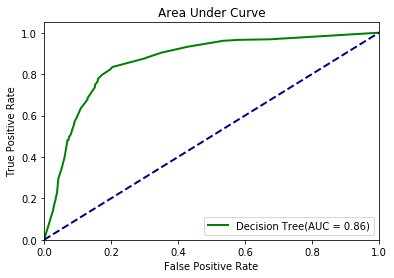

In [19]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [20]:
print (confusion_matrix(y_test, predictions))

[[2492  485]
 [ 570 2034]]


In [21]:
accuracy_score(y_test, predictions)

0.8109657767425192

In [22]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

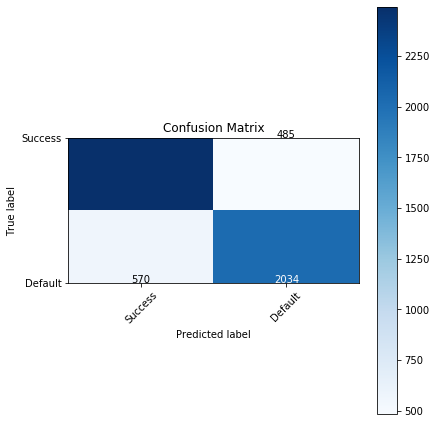

In [23]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

# Pruning of the tree

In [24]:
from sklearn.tree._tree import TREE_LEAF

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

print(sum(model_dt.tree_.children_left < 0))
# start pruning from the root
prune_index(model_dt.tree_, 0, 5)
sum(model_dt.tree_.children_left < 0)

#It means that the code has created 17 new leaf nodes 
#(by practically removing links to their ancestors). The tree, which has looked before like

120


133

In [25]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# plt.figure(figsize=(6,6))
# dot_data = StringIO()
# export_graphviz(model_dt, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())
